<a href="https://colab.research.google.com/github/NguyenVy2001/Python_Project-/blob/main/RFM_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
ecom = '/content/drive/MyDrive/Project DA/ecommerce retail.xlsx'
ecom_retail = pd.read_excel(ecom)
ecom_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
ecom_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Loại bỏ những dòng có Customer ID NULL và dòng duplicate
ecom_retail = ecom_retail.dropna(subset = ['CustomerID'], axis = 0).drop_duplicates()
print('Kích thước dataframe sau khi loại bỏ CustomerID null và các dòng trùng lặp: ', ecom_retail.shape)

Kích thước dataframe sau khi loại bỏ CustomerID null và các dòng trùng lặp:  (401604, 8)


In [ ]:
# Chuyển đổi một số cột sang kiểu dữ liệu có thể đúng
ecom_retail['InvoiceDate'] = pd.to_datetime(ecom_retail['InvoiceDate'])
ecom_retail['CustomerID'] = ecom_retail['CustomerID'].astype(int)
ecom_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
# Tìm đơn hàng bị cancel
cancel = ecom_retail[ecom_retail['Quantity'] < 0]

# Tính doanh thu bị thất thoát
cancel['Lost Revenue'] = cancel['Quantity'] * cancel['UnitPrice']
cancel

<ipython-input-29-629a07f44b28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel['Lost Revenue'] = cancel['Quantity'] * cancel['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Lost Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [ ]:
# Tính tổng lost revenue theo từng Customer ID
total_loss = cancel.groupby(['InvoiceNo', 'CustomerID', 'Country']).agg({'InvoiceDate': 'max', 'Lost Revenue': 'sum'}).reset_index()
total_loss

,InvoiceNo,CustomerID,Country,InvoiceDate,Lost Revenue
0,C536379,14527,United Kingdom,2010-12-01 09:41:00,-27.50
1,C536383,15311,United Kingdom,2010-12-01 09:49:00,-4.65
2,C536391,17548,United Kingdom,2010-12-01 10:24:00,-141.48
3,C536506,17897,United Kingdom,2010-12-01 12:38:00,-25.50
4,C536543,17841,United Kingdom,2010-12-01 14:30:00,-3.80
...,...,...,...,...,...
3649,C581484,16446,United Kingdom,2011-12-09 09:27:00,-168469.60
3650,C581490,14397,United Kingdom,2011-12-09 09:57:00,-32.53
3651,C581499,15498,United Kingdom,2011-12-09 10:28:00,-224.69
3652,C581568,15311,United Kingdom,2011-12-09 11:57:00,-54.75


In [ ]:
# Tìm những đơn hàng thành công
successed = ecom_retail[ecom_retail['Quantity'] >= 0]

# Chuyển đổi data type cột InvoiceNo
successed['InvoiceNo'] = successed['InvoiceNo'].astype(int)

# Tính Revenue
successed['Revenue'] = successed['Quantity'] * successed['UnitPrice']
successed


<ipython-input-32-04f374e57c78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successed['InvoiceNo'] = successed['InvoiceNo'].astype(int)
<ipython-input-32-04f374e57c78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successed['Revenue'] = successed['Quantity'] * successed['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [59]:
# Tính Revenue theo từng Customer ID
total_revenue = successed.groupby(['InvoiceNo', 'CustomerID', 'Country']).agg({'InvoiceDate': 'max', 'Revenue': 'sum'}).reset_index()
total_revenue

,InvoiceNo,CustomerID,Country,InvoiceDate,Revenue
0,536365,17850,United Kingdom,2010-12-01 08:26:00,139.12
1,536366,17850,United Kingdom,2010-12-01 08:28:00,22.20
2,536367,13047,United Kingdom,2010-12-01 08:34:00,278.73
3,536368,13047,United Kingdom,2010-12-01 08:34:00,70.05
4,536369,13047,United Kingdom,2010-12-01 08:35:00,17.85
...,...,...,...,...,...
18531,581583,13777,United Kingdom,2011-12-09 12:23:00,124.60
18532,581584,13777,United Kingdom,2011-12-09 12:25:00,140.64
18533,581585,15804,United Kingdom,2011-12-09 12:31:00,329.05
18534,581586,13113,United Kingdom,2011-12-09 12:49:00,339.20


In [60]:
total_revenue.describe()

,InvoiceNo,CustomerID,Revenue
count,18536.000000,18536.000000,18536.000000
mean,559527.999407,15266.224158,479.456673
std,13040.283892,1734.178524,1677.916285
min,536365.000000,12346.000000,0.000000
25%,548352.500000,13773.500000,157.200000
50%,559818.500000,15176.500000,302.565000
75%,570834.500000,16779.000000,469.467500
max,581587.000000,18287.000000,168469.600000


In [61]:
#Xác định khoảng thời gian kể từ lần giao dịch gần nhất của mỗi khách hàng cho tới reference date
total_revenue['InvoiceDate'] = pd.to_datetime(total_revenue['InvoiceDate'])
R_calculate_scores = total_revenue.groupby('CustomerID')['InvoiceDate'].max().reset_index()
reference_date = dt.datetime(2011, 12, 31)
R_calculate_scores ['Recency'] = (reference_date - R_calculate_scores['InvoiceDate']).dt.days

#Tính Recency Score theo phương pháp quintile, 1 là thấp nhất, 5 là cao nhất
scores = ['5', '4', '3', '2', '1']
R_calculate_scores['Recency_Score'] = pd.qcut(R_calculate_scores['Recency'], q= 5, labels = scores)

R_calculate_scores

,CustomerID,InvoiceDate,Recency,Recency_Score
0,12346,2011-01-18 10:01:00,346,1
1,12347,2011-12-07 15:52:00,23,5
2,12348,2011-09-25 13:13:00,96,2
3,12349,2011-11-21 09:51:00,39,4
4,12350,2011-02-02 16:01:00,331,1
...,...,...,...,...
4334,18280,2011-03-07 09:52:00,298,1
4335,18281,2011-06-12 10:53:00,201,1
4336,18282,2011-12-02 11:43:00,28,5
4337,18283,2011-12-06 12:02:00,24,5


In [65]:
#Tính số lần mua hàng của khách hàng
F_calculate_scores = total_revenue.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
F_calculate_scores.columns = ['CustomerID', 'Frequency']

# Định nghĩa điểm số
f_label = range(1, 6)

# Sử dụng hàm cut để tạo các khoảng và gán điểm số
F_calculate_scores['Frequency_Score'] = pd.qcut(F_calculate_scores['Frequency'].rank(method='first'), q=5, labels=False) + 1

# Chuyển cột thành kiểu dữ liệu số nguyên
F_calculate_scores['Frequency_Score'] = F_calculate_scores['Frequency_Score'].astype(int)

F_calculate_scores


,CustomerID,Frequency,Frequency_Score
0,12346,1,1
1,12347,7,5
2,12348,4,4
3,12349,1,1
4,12350,1,1
...,...,...,...
4334,18280,1,2
4335,18281,1,2
4336,18282,2,3
4337,18283,16,5


In [66]:
# Tính Revenue theo từng Customer ID
total_revenue = total_revenue.groupby(['CustomerID', 'Country'])['Revenue'].sum().reset_index()

#Tính Monetary Score
scores = ['1', '2', '3', '4', '5']
total_revenue['Monetary_Score'] = pd.qcut(total_revenue['Revenue'], q= 5, labels = scores)
total_revenue

,CustomerID,Country,Revenue,Monetary_Score
0,12346,United Kingdom,77183.60,5
1,12347,Iceland,4310.00,5
2,12348,Finland,1797.24,4
3,12349,Italy,1757.55,4
4,12350,Norway,334.40,2
...,...,...,...,...
4342,18280,United Kingdom,180.60,1
4343,18281,United Kingdom,80.82,1
4344,18282,United Kingdom,178.05,1
4345,18283,United Kingdom,2045.53,4


In [67]:
#Merge 3 table để có cái nhìn tổng quan
Monet_Recen = total_revenue.merge(R_calculate_scores, on  = 'CustomerID')
Re_Fre_Mo = Monet_Recen.merge(F_calculate_scores, on = 'CustomerID')

#Select những cột cần thiết
RFM_df = Re_Fre_Mo[['CustomerID', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Recency', 'Frequency', 'Revenue']]
RFM_df

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,Recency,Frequency,Revenue
0,12346,1,1,5,346,1,77183.60
1,12347,5,5,5,23,7,4310.00
2,12348,2,4,4,96,4,1797.24
3,12349,4,1,4,39,1,1757.55
4,12350,1,1,2,331,1,334.40
...,...,...,...,...,...,...,...
4342,18280,1,2,1,298,1,180.60
4343,18281,1,2,1,201,1,80.82
4344,18282,5,3,1,28,2,178.05
4345,18283,5,5,4,24,16,2045.53


In [68]:
#Tính điểm RFM
RFM_df['RFM_Score'] = RFM_df['Recency_Score'].astype(str) + RFM_df['Frequency_Score'].astype(str) + RFM_df['Monetary_Score'].astype(str)
RFM_df

<ipython-input-68-45344edffa12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_df['RFM_Score'] = RFM_df['Recency_Score'].astype(str) + RFM_df['Frequency_Score'].astype(str) + RFM_df['Monetary_Score'].astype(str)


,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,Recency,Frequency,Revenue,RFM_Score
0,12346,1,1,5,346,1,77183.60,115
1,12347,5,5,5,23,7,4310.00,555
2,12348,2,4,4,96,4,1797.24,244
3,12349,4,1,4,39,1,1757.55,414
4,12350,1,1,2,331,1,334.40,112
...,...,...,...,...,...,...,...,...
4342,18280,1,2,1,298,1,180.60,121
4343,18281,1,2,1,201,1,80.82,121
4344,18282,5,3,1,28,2,178.05,531
4345,18283,5,5,4,24,16,2045.53,554


In [69]:
segment = '/content/drive/MyDrive/Project DA/Segmentation.xlsx'
segmentation = pd.read_excel(segment)

segment_dict = segmentation.set_index('Segment')['RFM Score'].apply(lambda x: x.split(', ')).to_dict()
segment_dict

{'Champions': ['555', '554', '544', '545', '454', '455', '445'],
 'Loyal': ['543', '444', '435', '355', '354', '345', '344', '335'],
 'Potential Loyalist': ['553',
  '551',
  '552',
  '541',
  '542',
  '533',
  '532',
  '531',
  '452',
  '451',
  '442',
  '441',
  '431',
  '453',
  '433',
  '432',
  '423',
  '353',
  '352',
  '351',
  '342',
  '341',
  '333',
  '323'],
 'New Customers': ['512', '511', '422', '421', '412', '411', '311'],
 'Promising': ['525',
  '524',
  '523',
  '522',
  '521',
  '515',
  '514',
  '513',
  '425',
  '424',
  '413',
  '414',
  '415',
  '315',
  '314',
  '313'],
 'Need Attention': ['535', '534', '443', '434', '343', '334', '325', '324'],
 'About To Sleep': ['331', '321', '312', '221', '213', '231', '241', '251'],
 'At Risk': ['255',
  '254',
  '245',
  '244',
  '253',
  '252',
  '243',
  '242',
  '235',
  '234',
  '225',
  '224',
  '153',
  '152',
  '145',
  '143',
  '142',
  '135',
  '134',
  '133',
  '125',
  '124'],
 'Cannot Lose Them': ['155', '154', '

In [70]:
#Phân loại Customer
def categorize_customer(RFM_score, segment_dict):
    for segment, score_list in segment_dict.items():
        if RFM_score in score_list:
            return segment
    return 'Unknown'

RFM_df['Customer_Segment'] = RFM_df['RFM_Score'].apply(categorize_customer, segment_dict=segment_dict)
RFM_df

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,Recency,Frequency,Revenue,RFM_Score,Customer_Segment
0,12346,1,1,5,346,1,77183.60,115,Cannot Lose Them
1,12347,5,5,5,23,7,4310.00,555,Champions
2,12348,2,4,4,96,4,1797.24,244,At Risk
3,12349,4,1,4,39,1,1757.55,414,Promising
4,12350,1,1,2,331,1,334.40,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4342,18280,1,2,1,298,1,180.60,121,Lost customers
4343,18281,1,2,1,201,1,80.82,121,Lost customers
4344,18282,5,3,1,28,2,178.05,531,Potential Loyalist
4345,18283,5,5,4,24,16,2045.53,554,Champions


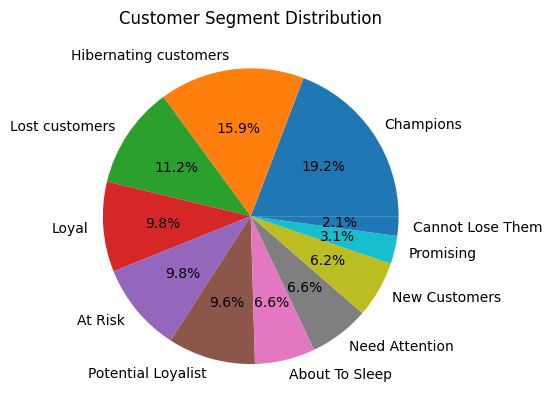

In [72]:
segment_counts = RFM_df['Customer_Segment'].value_counts()
segment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title('Customer Segment Distribution')
plt.show()

Nhìn chung tình hình kinh doanh hiện tại của công ty đang ở mức tốt.

Qua biểu đồ trên ta thấy được lượng khách hàng Champions chiếm tỉ lệ cao nhất cho thấy được chiến lược quảng bá sản phẩm, các chương trình ưu đãi đã mang hiệu suất cao và chất lượng các sản phẩm đang được kinh doanh được duy trì ổn định.

Xếp thứ hai là nhóm Hibernating tuy lượng đơn hàng không nhiều bằng nhóm Champions nhưng đây cũng là nhóm khách hàng tiềm năng để công ty có thể tạo mối quan hệ với khách hàng.

Tuy nhiên nhóm khách hàng Lost và At risk cũng mang tỉ lệ cao tương đối, team Sales và Customer Support nên chú ý nhiều hơn về trải nghiệm mua hàng của họ cũng như tìm ra được nguyên nhân khiến họ không hài lòng về dịch vụ của công ty, có thể đến từ chất lượng sản phẩm, chất lượng giao hàng hoặc chương trình hỗ trợ hậu mua hàng.

<ipython-input-75-30a35577b4ec>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[col])


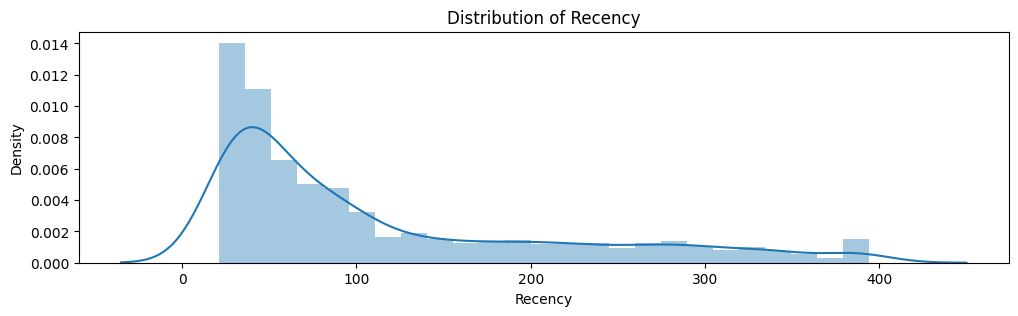

<ipython-input-75-30a35577b4ec>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[col])


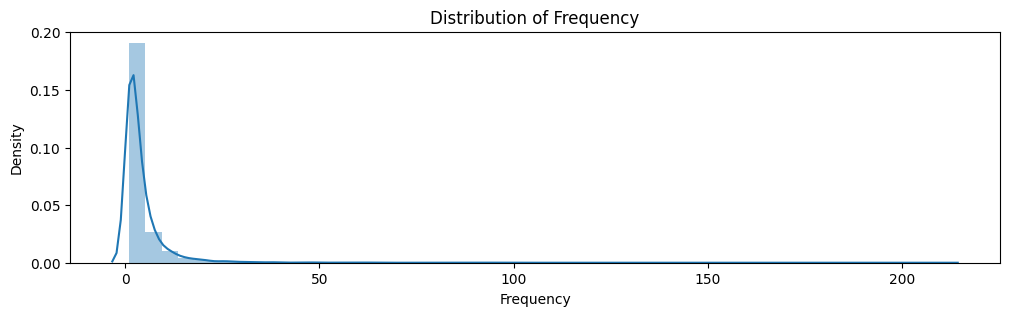

<ipython-input-75-30a35577b4ec>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[col])


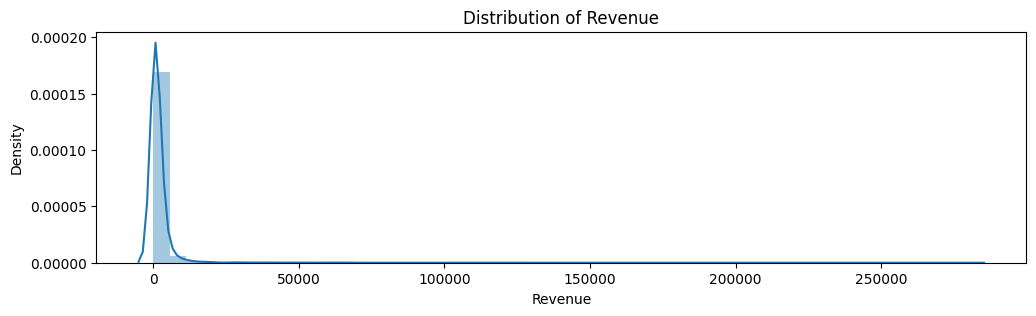

In [75]:
# Show distribution of each variable of the model
colnames = ['Recency', 'Frequency', 'Revenue']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(RFM_df[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

<ipython-input-76-7bb28fafbed7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = RFM_df, x= 'Customer_Segment', y= 'Revenue', ci = None, estimator = 'sum')


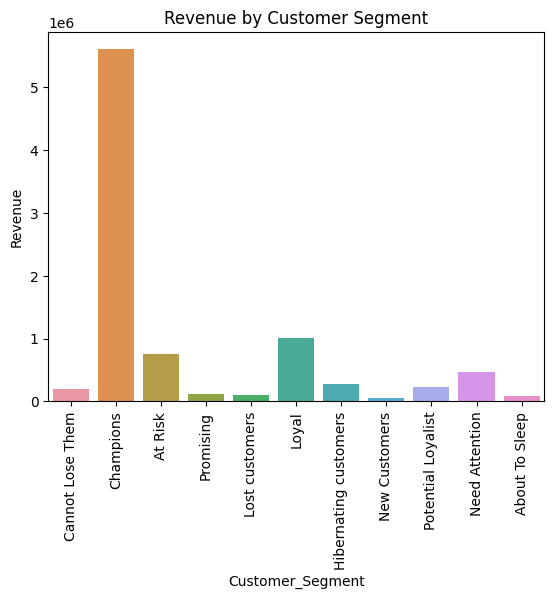

In [76]:
sns.barplot(data = RFM_df, x= 'Customer_Segment', y= 'Revenue', ci = None, estimator = 'sum')
plt.xticks(rotation=90)
plt.title('Revenue by Customer Segment')
plt.show()

Với mô hình kinh doanh bán lẻ các sản phphẩm liên quan đến mừng giáng sinh và năm mới của công ty, team Marketing và Sales có thể quan tâm đến hai chỉ số là Frequency và Monetary.

Quan tâm đến chỉ số Frequency sẽ cho ta biết được mức độ thường xuyên mua hàng của khách hàng, cũng như có thể phân loại được từng nhóm khác nhau để lựa chọn ra được từng chiến lược phù hợp cho từng nhóm khách hàng.

Chỉ số Monetary sẽ cho biết được mức độ đóng góp doanh thu của từng khách hàng, vì các mặt hàng liên quan đến giáng sinh và năm mới là mặt hàng mang tính thời vụ nên là trong khoảng thời gian ngắn như vậy việc làm sao đưa ra được những chiến lược quảng bá sản phẩm hiệu, gia tăng doanh thu cho công ty cũng là một điều tất yếu.

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
|Champions|Mới mua sắm thời gian gần đây, thường xuyên mua và chi tiêu nhiều nhất!|Đưa ra những ưu đãi độc quyền cho họ. Có thể là người sớm nhất trải nghiệm sản phẩm mới để họ quảng bá thương hiệu của bạn.|
|Loyal|Thường xuyên đóng góp doanh thu cho công ty. Phản ứng tích cực với khuyến mãi.|Bán thêm sản phẩm có giá trị cao hơn. Yêu cầu đánh giá về sản phẩm. Tương tác với họ.|
|Potential Loyalist|Khách hàng gần đây, nhưng đã chi tiêu một khoản lớn và mua nhiều lần.|Đề xuất chương trình thành viên / chương trình trung thành, giới thiệu các sản phẩm khác.|
|New customers|Vừa mua gần đây, nhưng không thường xuyên.|Cung cấp hỗ trợ đưa họ vào chương trình khách hàng thân thiết, giúp họ có những ưu đãi sớm, bắt đầu xây dựng mối quan hệ.|
|Promising|Người mua gần đây, nhưng chưa chi tiêu nhiều.|Tạo nhận thức về thương hiệu, cung cấp phiên bản dùng thử miễn phí.|
|Need attention| Điểm RFM khá là thấp. Có thể đã không mua gì gần đây.	|Tạo ưu đãi trong thời gian ngắn, đề xuất dựa trên các giao dịch trước đó. Kích cầu mua sắm cho họ.|
|About to sleep|Điểm RFM thấp. Sẽ mất họ nếu không kích hoạt lại.|Chia sẻ nguồn lực giá trị, đề xuất sản phẩm phổ biến với giảm giá, reconnect họ.|
|At risk|Đã chi tiêu nhiều và mua thường xuyên nhưng đó là khoảng thời gian trước .|Cần đưa họ quay lại!	Gửi email cá nhân để reconnect, đề xuất gia hạn, cung cấp tài nguyên hữu ích.|
|Cannot lose them |Đã mua sắm nhiều nhất, và thường nhưng đã lâu không quay lại.	|Kích cầu mua sắm họ lại thông qua gia hạn hoặc sản phẩm mới, không để họ chuyển sang đối thủ, nói chuyện với họ.|
|Hibernating customers|Lần mua hàng cuối cùng đã lâu, chi tiêu thấp và số đơn đặt hàng thấp.|Đề xuất các sản phẩm khác và giảm giá đặc biệt. Tái tạo giá trị thương hiệu.|
|Lost customers|Điểm RFM thấp nhất.|	Hồi sinh sự quan tâm với chiến dịch tiếp cận, nếu không thì bỏ qua.|